In [1]:
%matplotlib notebook
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy import constants
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


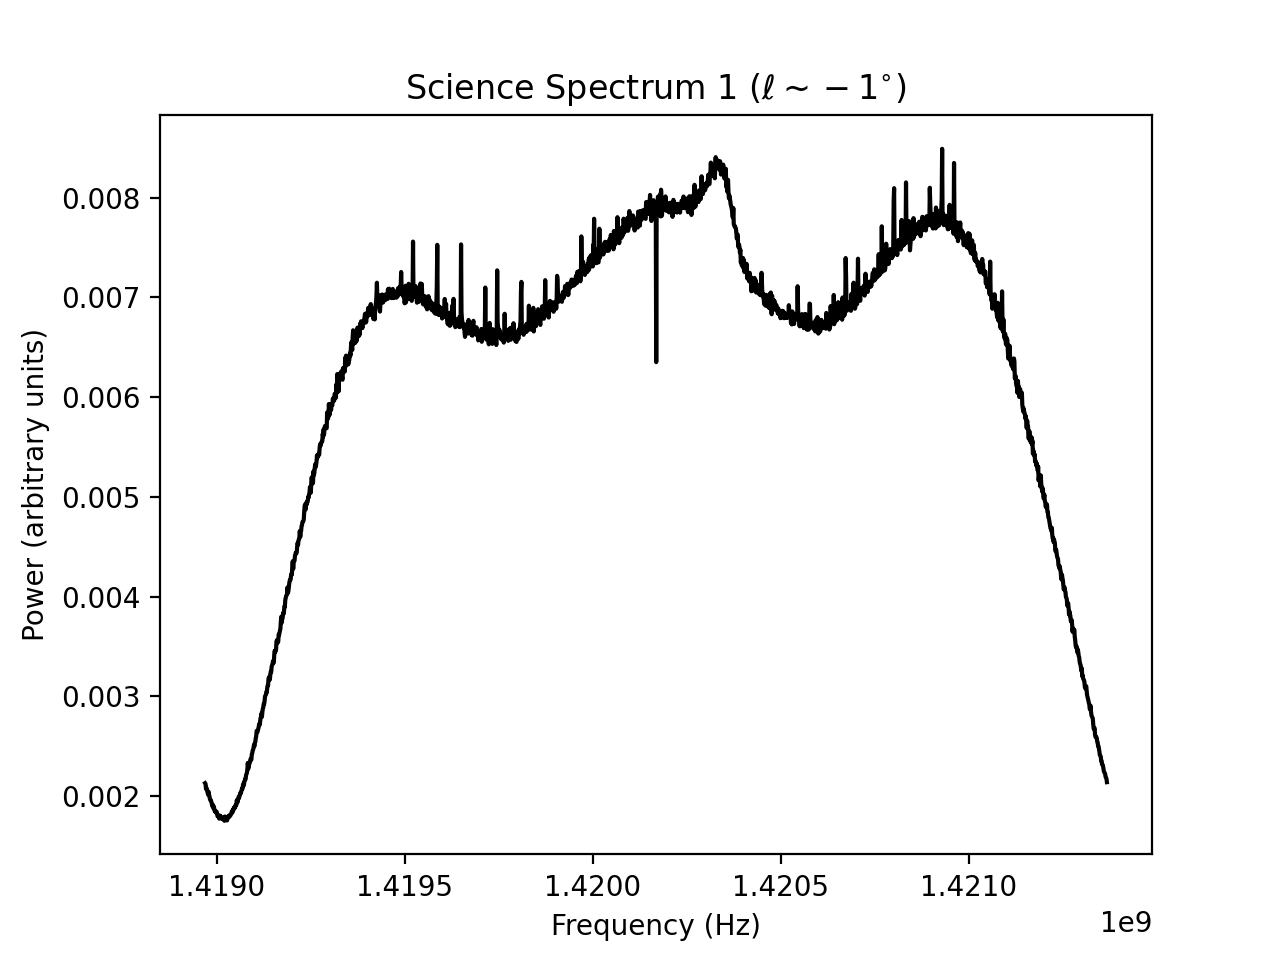

<IPython.core.display.Javascript object>


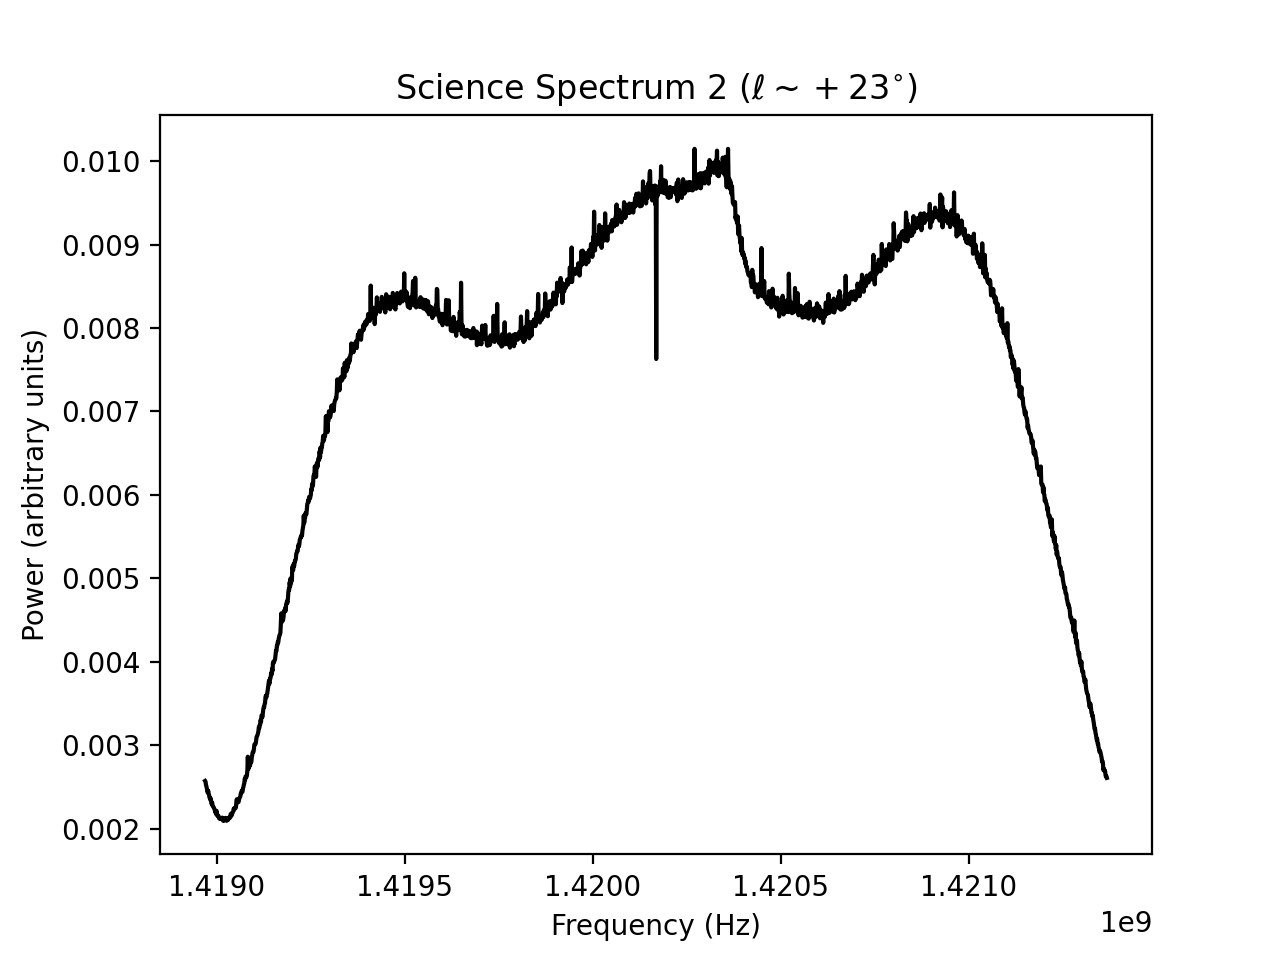

<IPython.core.display.Javascript object>


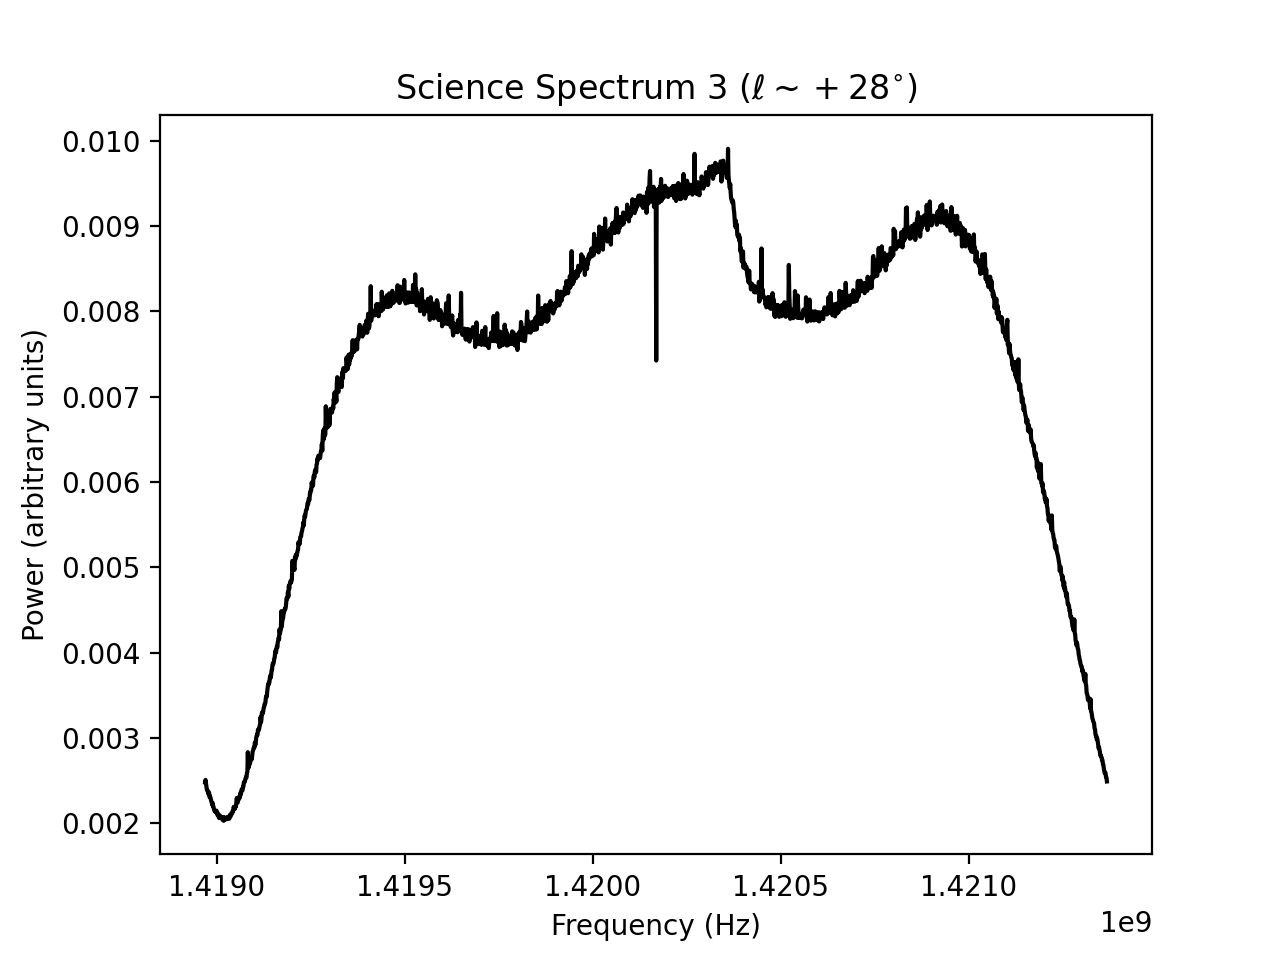

In [45]:
# Import science spectra
sci1 = Table.read('psd_201113_133903_tint60s_sdr0_fswscience_loc1_60s.fits')
sci2 = Table.read('psd_201113_134953_tint60s_sdr0_fswscience_loc2_60s.fits')
sci3 = Table.read('psd_201113_135520_tint60s_sdr0_fswscience_loc3_60s.fits')

plt.figure(dpi=100)
plt.title(r'Science Spectrum 1 ($\ell \sim -$1$^{\circ}$)')
plt.ylabel('Power (arbitrary units)')
plt.xlabel('Frequency (Hz)')
plt.plot(sci1['freq2'], sci1['power2'], 'k-')
plt.show()

# Calculate channel width
frequencies = sci2['freq1']
channel_width = (frequencies[1]-frequencies[0])*(u.Hz)

plt.figure(dpi=100)
plt.title(r'Science Spectrum 2 ($\ell \sim +$23$^{\circ}$)')
plt.ylabel('Power (arbitrary units)')
plt.xlabel('Frequency (Hz)')
plt.plot(sci2['freq2'], sci2['power2'], 'k-')
plt.show()

plt.figure(dpi=100)
plt.title(r'Science Spectrum 3 ($\ell \sim +$28$^{\circ}$)')
plt.ylabel('Power (arbitrary units)')
plt.xlabel('Frequency (Hz)')
plt.plot(sci3['freq2'], sci3['power2'], 'k-')
plt.show()

In [21]:
# Science image 1

# Convert frequency-switching power to brightness temperature with gain factor
gain = 4.4626444*(10**(15))*(1/(u.Hz*u.J))
calibrated_sci1_T = sci1['fsw_pow']/(gain*channel_width*constants.k_B)
calibrated_sci1_T.unit

# Plot with corrected brightness temperature units
plt.figure(dpi=100)
plt.title(r"Calibrated Spectrum 1 ($\ell \sim -$1$^{\circ}$)")
plt.ylabel('Brightness Temperature (K)')
plt.xlabel('Frequency (Hz)')
plt.plot(sci1['freq1'], calibrated_sci1_T, 'k-')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [22]:
# Convert frequency-switching power to brightness temperature with gain factor
gain = 4.4626444*(10**(15))*(1/(u.Hz*u.J))
calibrated_sci2_T = sci2['fsw_pow']/(gain*channel_width*constants.k_B)
calibrated_sci2_T.unit

# Plot with corrected brightness temperature units
plt.figure(dpi=100)
plt.title(r"Calibrated Spectrum 2 ($\ell \sim +$23$^{\circ}$)")
plt.ylabel('Brightness Temperature (K)')
plt.xlabel('Frequency (Hz)')
plt.plot(sci2['freq1'], calibrated_sci2_T, 'k-')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


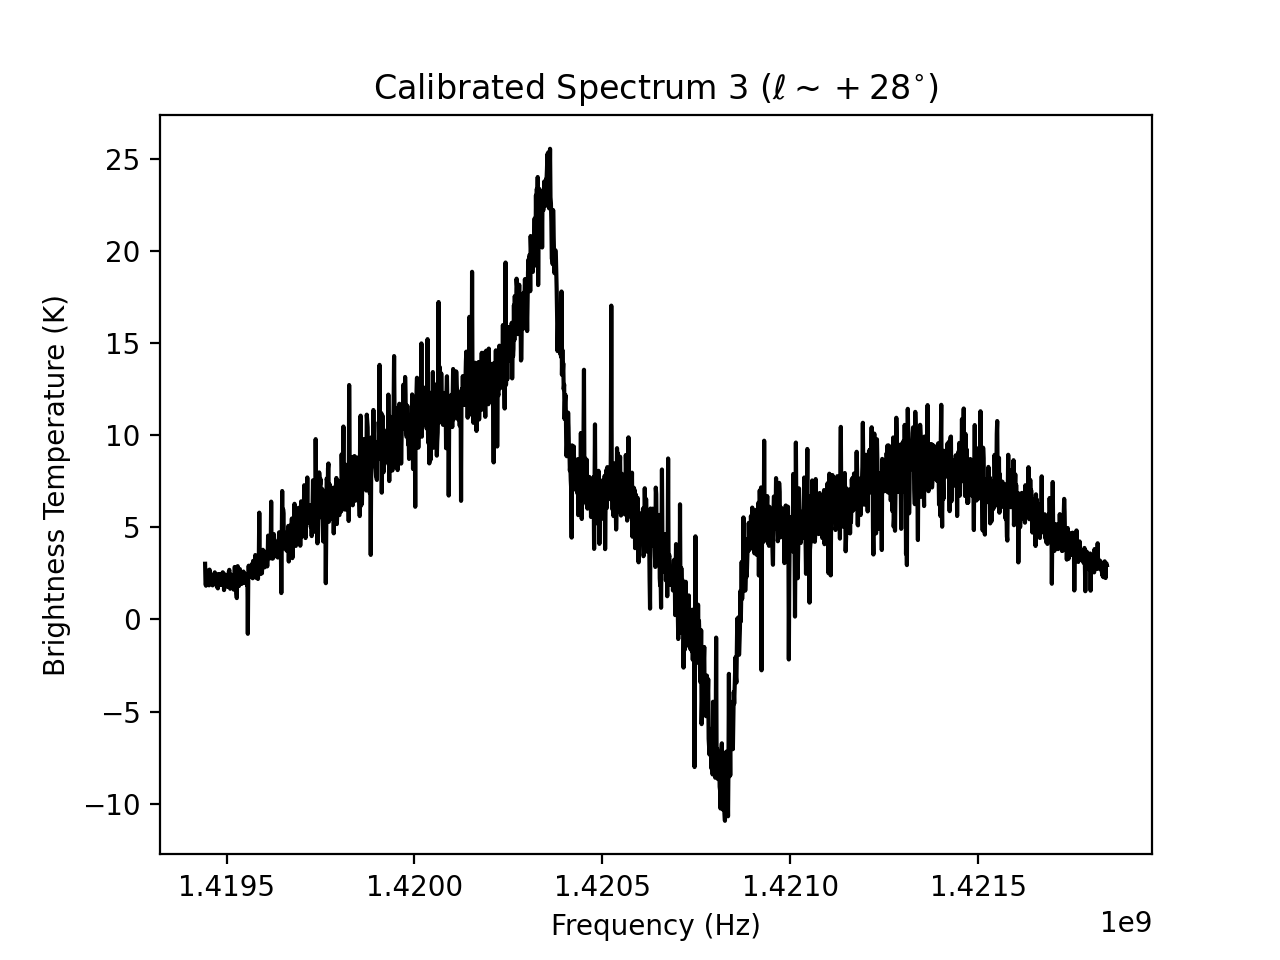

In [23]:
# Convert frequency-switching power to brightness temperature with gain factor
gain = 4.4626444*(10**(15))*(1/(u.Hz*u.J))
calibrated_sci3_T = sci3['fsw_pow']/(gain*channel_width*constants.k_B)
calibrated_sci3_T.unit

# Plot with corrected brightness temperature units
plt.figure(dpi=100)
plt.title(r"Calibrated Spectrum 3 ($\ell \sim +$28$^{\circ}$)")
plt.ylabel('Brightness Temperature (K)')
plt.xlabel('Frequency (Hz)')
plt.plot(sci3['freq1'], calibrated_sci3_T, 'k-')
plt.show()

[-18498.55845682  26286.76598831]
 
-1.85e+04 x + 2.629e+04


<IPython.core.display.Javascript object>


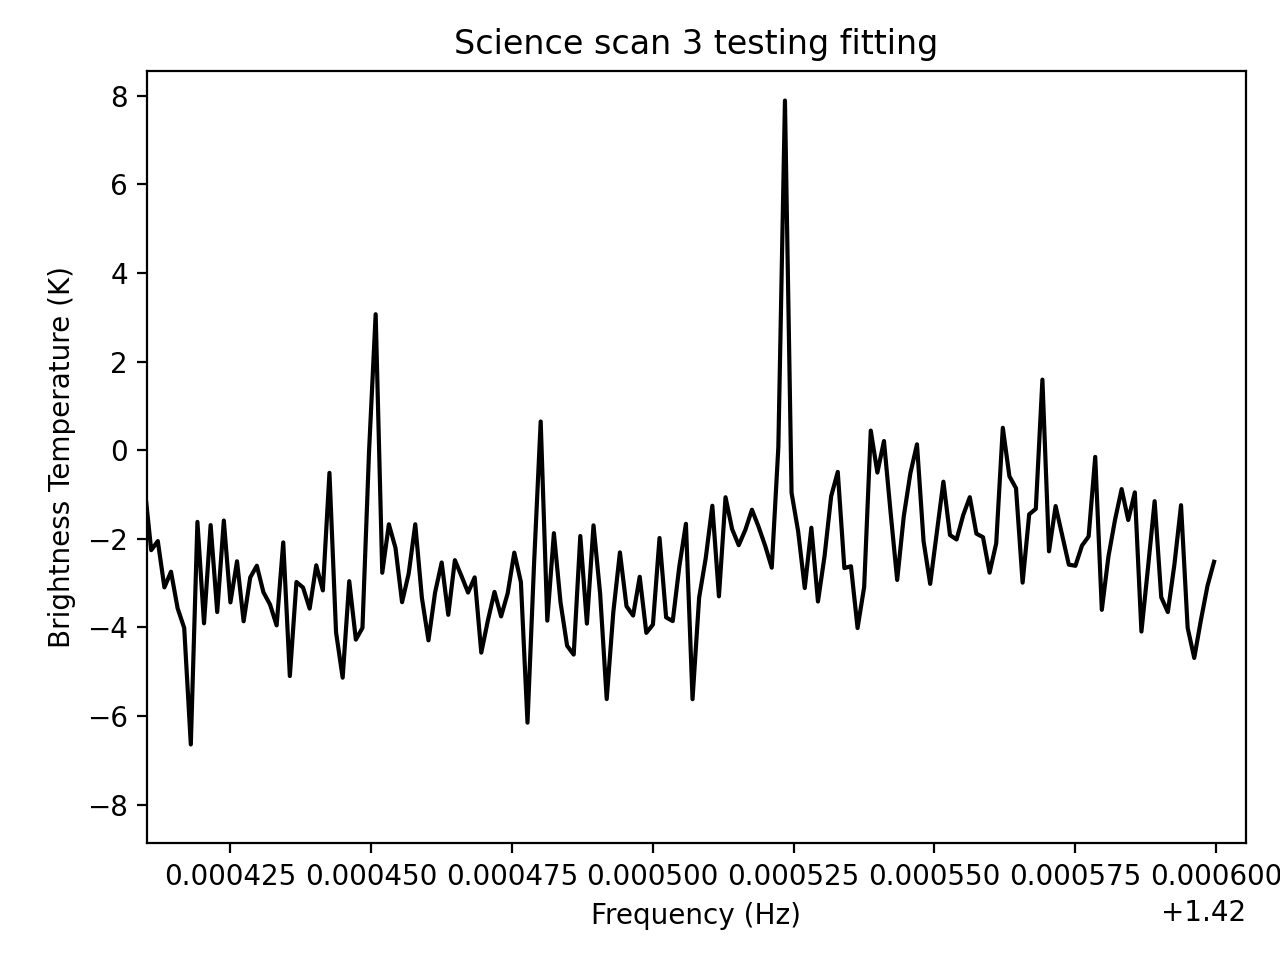

In [44]:
fitting_frequencies_indices = np.where((sci1['freq1'] > 1.4201*(10**9)) & (sci1['freq1'] < 1.4206*(10**9)))
good_freq_1 = sci1['freq1'][fitting_frequencies_indices]
good_temp_1 = calibrated_sci1_T[fitting_frequencies_indices]

good_freq_2 = sci2['freq1'][fitting_frequencies_indices]
good_temp_2 = calibrated_sci2_T[fitting_frequencies_indices]

good_freq_3 = sci3['freq1'][fitting_frequencies_indices]
good_temp_3 = calibrated_sci3_T[fitting_frequencies_indices]

good_freq_1 = good_freq_1/(10**9)
good_freq_2 = good_freq_2/(10**9)
good_freq_3 = good_freq_3/(10**9)



coeffs = np.polyfit(good_freq_3, good_temp_3, deg=1)  # determine coefficients for a polynomial of degree 5 to be fit to the data
print(coeffs)  # A*x^5 + B*x^4 + C*x^3 + D*x^2 + E*x + F; very small valued coefficients indicate you’re probably over-fitting
# coeffs[1] = 9.5 * 10**4
polynomial = np.poly1d(coeffs)  # create a poly1d object from our coefficients for np.polyval to use
fitted_temps = np.polyval(polynomial, good_freq_3)  # get the wavelength from the fit for the specified detector coordinates
print(polynomial)
fitted_temps = fitted_temps * u.K

plt.figure(dpi=100)
plt.title('Science scan 3 testing fitting')
plt.ylabel('Brightness Temperature (K)')
plt.xlabel('Frequency (Hz)')
plt.plot(good_freq_3, good_temp_3 - fitted_temps, 'k-')
# plt.plot(good_freq_1, fitted_temps, 'k-')
plt.tight_layout()
plt.show()

In [46]:
from scipy.optimize import curve_fit

def gauss(x, a, mu, sigma):
    return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=good_freq_1, ydata=good_temp_1-5*u.K, p0=[10,1.42035,0.01]) 
print("Amplitude:",popt[0]) 
print("Mean value:",popt[1]) 
print("Sigma:",popt[2]) 
# print(np.diag(pcov))

# freq_unc = np.diag(pcov)[1]
# print(freq_unc)

plt.figure(dpi=100)
plt.plot(good_freq_1,good_temp_1-5*u.K,label='data')
plt.plot(good_freq_1,gauss(good_freq_1,*popt),label='fit')
plt.legend()
plt.title(r'Calibrated Spectrum 1 — Gaussian Fitting')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Brightness Temperature (K)')
plt.show()

# cov_diag = np.diag(fit_s.fit_info[‘param_cov’])
# print(cov_diag)

Amplitude: 12.016358941290747
Mean value: 1.4203331635178635
Sigma: 5.0575732813241935e-05


<IPython.core.display.Javascript object>

In [47]:
# freq to velocity
centroid_freq = 1.42033316 * u.GHz
nu_hi = 1.420405752 * u.GHz

measured_velocity = (nu_hi - centroid_freq) / nu_hi  * constants.c
print(measured_velocity)

15321.350311689484 m / s


In [9]:
# def moment1_uncertainty(xaxis, data, uncertainty):
#     delta_nu = channel_width
#     deltax = xaxis[1] - xaxis[0]
#     moment0 = (data * deltax).sum()
#     moment0_uncertainty = (len(data) * deltax**2 * (uncertainty**2))**0.5
#     moment1 = (data * xaxis * deltax).sum() / moment0
#     left_term = ((deltax * uncertainty * (xaxis - moment1))**2).sum() / moment0**2
#     right_term = (moment0_uncertainty**2 *
#                   (((xaxis - moment1) * data * delta_nu)**2).sum()) / moment0**4
#     moment1_uncertainty = (left_term + right_term)**0.5
#     return moment1, moment1_uncertainty

# noisy_moment1, noisy_moment1_uncertainty = moment1_uncertainty(good_freq_1*u.GHz, good_temp_1-5*u.K, 0.1*u.K)
# print(noisy_moment1_uncertainty)
# m1_velocity = (nu_hi - noisy_moment1) / nu_hi * constants.c
# m1_velocity_uncertainty = noisy_moment1_uncertainty / nu_hi * constants.c
# print(f"m1 = {m1_velocity:0.1f} +/- {m1_velocity_uncertainty:0.1f}")

In [48]:
from scipy.optimize import curve_fit

def gauss(x, a, mu, sigma):
    return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=good_freq_2, ydata=good_temp_2-5*u.K, p0=[10,1.42035,0.01]) 
print("Amplitude:",popt[0]) 
print("Mean value:",popt[1]) 
print("Sigma:",popt[2]) 
# print(np.diag(pcov))

# freq_unc = np.diag(pcov)[1]
# print(freq_unc)

plt.figure(dpi=100)
plt.plot(good_freq_2,good_temp_2-5*u.K,label='data')
plt.plot(good_freq_2,gauss(good_freq_2,*popt),label='fit')
plt.legend()
plt.title(r'Calibrated Spectrum 2 — Gaussian Fitting')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Brightness Temperature (K)')
plt.show()

# freq to velocity
centroid_freq = popt[1] * u.GHz
nu_hi = 1.420405752 * u.GHz

measured_velocity = (nu_hi - centroid_freq) / nu_hi  * constants.c
print(measured_velocity)

Amplitude: 13.31353603348232
Mean value: 1.420301275812614
Sigma: -8.605741761239206e-05


<IPython.core.display.Javascript object>

22050.86326554024 m / s


In [49]:
from scipy.optimize import curve_fit

def gauss(x, a, mu, sigma):
    return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=good_freq_3, ydata=good_temp_3-5*u.K, p0=[10,1.42035,0.01]) 
print("Amplitude:",popt[0]) 
print("Mean value:",popt[1]) 
print("Sigma:",popt[2]) 
# print(np.diag(pcov))

# freq_unc = np.diag(pcov)[1]
# print(freq_unc)

plt.figure(dpi=100)
plt.plot(good_freq_3,good_temp_3-5*u.K,label='data')
plt.plot(good_freq_3,gauss(good_freq_3,*popt),label='fit')
plt.legend()
plt.title(r'Calibrated Spectrum 3 — Gaussian Fitting')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Brightness Temperature (K)')
plt.show()

# freq to velocity
centroid_freq = popt[1] * u.GHz
nu_hi = 1.420405752 * u.GHz

measured_velocity = (nu_hi - centroid_freq) / nu_hi  * constants.c
print(measured_velocity)

Amplitude: 13.851237162550566
Mean value: 1.4202967956151127
Sigma: 0.00010785538448856717


<IPython.core.display.Javascript object>

22996.458859842995 m / s


In [60]:
# Now we are measuring some more velocities bc the lab says to
import pytz
from astropy import units as u, coordinates
from astroplan import Observer
import datetime

tz = pytz.timezone('US/Eastern')
gainesville_location = coordinates.EarthLocation.from_geodetic(lon=-82.3*u.deg, lat=29.6*u.deg, height=100*u.m)
observer = Observer(gainesville_location, timezone='US/Eastern')

##### SCAN 1 !!!!
obs_time_notz = datetime.datetime(year=2020, month=11, day=13, hour=13, minute=37, second=0)
obs_time = tz.localize(obs_time_notz)

alt = 27*u.deg
az = 163*u.deg
target_altaz = coordinates.SkyCoord(alt=alt,
                                    az=az,
                                    location=observer.location,
                                    obstime=obs_time, frame='altaz')

# we want the coordinate in both altaz and galactic
target_galactic = target_altaz.galactic

target_altaz, target_galactic

(<SkyCoord (AltAz: obstime=2020-11-13 18:37:00, location=(743674.13504562, -5500332.52750589, 3131946.80724394) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
     (163., 27.)>,
 <SkyCoord (Galactic): (l, b) in deg
     (358.71018903, -2.05448076)>)

In [62]:
# our velocity in the direction of the target
target_galactic.radial_velocity_correction()

<Quantity -17291.09647752 m / s>

In [63]:
### scan 1 velocity -> barycentric
observed_line_of_sight_velocity = 15321*u.m/u.s
# Convert to barycentric coords
velocity_bary = observed_line_of_sight_velocity + target_galactic.radial_velocity_correction()
print(velocity_bary)

-1970.0964775200264 m / s


In [66]:
skycoord_withvel = coordinates.SkyCoord(ra=target_altaz.icrs.ra, dec=target_altaz.icrs.dec,
                                        radial_velocity=velocity_bary,
                                        pm_ra_cosdec=0*u.arcmin/u.yr, pm_dec=0*u.arcmin/u.yr, distance=1*u.pc,
                                        frame='icrs')
skycoord_withvel

### LSR vel
# we take the skycoord_withvel defined in the previous cell and "transform" it to LSR
# note that the skyframe was in the ICRS frame - this is important, since the frames
# all move with respect to one another
lsrcoord = skycoord_withvel.transform_to(coordinates.LSR)
lsrcoord.radial_velocity

<Quantity 8.58470713 km / s>

In [ ]:
###################################################################

In [67]:
##### SCAN 2 !!!!
obs_time_notz = datetime.datetime(year=2020, month=11, day=13, hour=13, minute=46, second=0)
obs_time = tz.localize(obs_time_notz)

alt = 44*u.deg
az = 143*u.deg
target_altaz = coordinates.SkyCoord(alt=alt,
                                    az=az,
                                    location=observer.location,
                                    obstime=obs_time, frame='altaz')

# we want the coordinate in both altaz and galactic
target_galactic = target_altaz.galactic

target_altaz, target_galactic

(<SkyCoord (AltAz: obstime=2020-11-13 18:46:00, location=(743674.13504562, -5500332.52750589, 3131946.80724394) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
     (143., 44.)>,
 <SkyCoord (Galactic): (l, b) in deg
     (22.81878586, -0.05189779)>)

In [68]:
# our velocity in the direction of the target
target_galactic.radial_velocity_correction()

<Quantity -20853.51563293 m / s>

In [69]:
### scan 2 velocity -> barycentric
observed_line_of_sight_velocity = 22051*u.m/u.s
# Convert to barycentric coords
velocity_bary = observed_line_of_sight_velocity + target_galactic.radial_velocity_correction()
print(velocity_bary)

1197.4843670736263 m / s


In [70]:
skycoord_withvel = coordinates.SkyCoord(ra=target_altaz.icrs.ra, dec=target_altaz.icrs.dec,
                                        radial_velocity=velocity_bary,
                                        pm_ra_cosdec=0*u.arcmin/u.yr, pm_dec=0*u.arcmin/u.yr, distance=1*u.pc,
                                        frame='icrs')
skycoord_withvel

### LSR vel
# we take the skycoord_withvel defined in the previous cell and "transform" it to LSR
# note that the skyframe was in the ICRS frame - this is important, since the frames
# all move with respect to one another
lsrcoord = skycoord_withvel.transform_to(coordinates.LSR)
lsrcoord.radial_velocity

<Quantity 16.16907151 km / s>

In [71]:
###################################################################

In [72]:
##### SCAN 3 !!!!
obs_time_notz = datetime.datetime(year=2020, month=11, day=13, hour=13, minute=52, second=0)
obs_time = tz.localize(obs_time_notz)

alt = 49*u.deg
az = 139*u.deg
target_altaz = coordinates.SkyCoord(alt=alt,
                                    az=az,
                                    location=observer.location,
                                    obstime=obs_time, frame='altaz')

# we want the coordinate in both altaz and galactic
target_galactic = target_altaz.galactic

target_altaz, target_galactic

(<SkyCoord (AltAz: obstime=2020-11-13 18:52:00, location=(743674.13504562, -5500332.52750589, 3131946.80724394) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
     (139., 49.)>,
 <SkyCoord (Galactic): (l, b) in deg
     (28.35171943, 1.62972974)>)

In [73]:
# our velocity in the direction of the target
target_galactic.radial_velocity_correction()

<Quantity -20733.05066669 m / s>

In [75]:
### scan 3 velocity -> barycentric
observed_line_of_sight_velocity = 22996*u.m/u.s
# Convert to barycentric coords
velocity_bary = observed_line_of_sight_velocity + target_galactic.radial_velocity_correction()
print(velocity_bary)

2262.949333305147 m / s


In [76]:
skycoord_withvel = coordinates.SkyCoord(ra=target_altaz.icrs.ra, dec=target_altaz.icrs.dec,
                                        radial_velocity=velocity_bary,
                                        pm_ra_cosdec=0*u.arcmin/u.yr, pm_dec=0*u.arcmin/u.yr, distance=1*u.pc,
                                        frame='icrs')
skycoord_withvel

### LSR vel
# we take the skycoord_withvel defined in the previous cell and "transform" it to LSR
# note that the skyframe was in the ICRS frame - this is important, since the frames
# all move with respect to one another
lsrcoord = skycoord_withvel.transform_to(coordinates.LSR)
lsrcoord.radial_velocity

<Quantity 18.04394884 km / s>